#  Machine Learning Analysis of COVID-19 Data

#### Import necessary packages for the machine learning analysis: 

In [385]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error, r2_score

## Logistic Regression: COVID-19 Global Data 

### The dependent variable that will be observed in the scenario of global data is the total deaths in comparison to the independent variables of the total recovered and  COVID-19 patients that have or have not visited Wuhan, China. 

#### Import binary COVID-19 data

In [96]:
sample = pd.read_csv(r"COVID19_line_list_data.csv")

In [166]:
sample = pd.DataFrame(sample)

#### Clean and organize the data

In [167]:
data = sample.drop(columns = ['summary', 'location', 'id', 'case_in_country', 'reporting date', 'Unnamed: 3', 'country', 'gender', 'age', 'symptom_onset', 'If_onset_approximated', 'hosp_visit_date', 'exposure_start', 'exposure_end', 'link', 'source', 'from Wuhan', 'symptom'])

In [168]:
data = data.reset_index().drop(columns = ['index'])

In [171]:
data = data[data.death != '2/1/2020']

In [172]:
data = data[data.death != '2/13/2020']

In [173]:
data = data[data.death != '2/14/2020']

In [174]:
data = data[data.death != '2/19/2020']

In [175]:
data = data[data.death != '2/21/2020']

In [176]:
data = data[data.death != '2/22/2020']

In [177]:
data = data[data.death != '2/23/2020']

In [178]:
data = data[data.death != '2/24/2020']

In [179]:
data = data[data.death != '2/25/2020']

In [180]:
data = data[data.death != '2/26/2020']

In [181]:
data = data[data.death != '2/27/2020']

In [182]:
data = data[data.death != '2/28/2020']

In [292]:
data.death.unique()

array(['0', '1'], dtype=object)

In [209]:
data = data[data.recovered != '2/12/2020']

In [211]:
data = data[data.recovered != '1/15/2020']

In [213]:
data = data[data.recovered != '12/30/1899']

In [214]:
data = data[data.recovered != '2/8/2020']

In [215]:
data = data[data.recovered != '2/14/2020']

In [216]:
data = data[data.recovered != '2/4/2020']

In [217]:
data = data[data.recovered != '2/18/2020']

In [218]:
data = data[data.recovered != '2/5/2020']

In [219]:
data = data[data.recovered != '2/17/2020']

In [220]:
data = data[data.recovered != '2/9/2020']

In [221]:
data = data[data.recovered != '2/15/2020']

In [222]:
data = data[data.recovered != '2/27/2020']

In [223]:
data = data[data.recovered != '2/19/2020']

In [224]:
data = data[data.recovered != '2/20/2020']

In [225]:
data = data[data.recovered != '1/17/2020']

In [226]:
data = data[data.recovered != '2/7/2020']

In [227]:
data = data[data.recovered != '2/21/2020']

In [228]:
data = data[data.recovered != '2/23/2020']

In [229]:
data = data[data.recovered != '2/11/2020']

In [230]:
data = data[data.recovered != '2/22/2020']

In [231]:
data = data[data.recovered != '2/16/2020']

In [232]:
data = data[data.recovered != '2/24/2020']

In [233]:
data = data[data.recovered != '2/26/2020']

In [234]:
data = data[data.recovered != '2/25/2020']

In [235]:
data = data[data.recovered != '2/6/2020']

In [236]:
data = data[data.recovered != '2/28/2020']

In [237]:
data = data[data.recovered != '1/30/2020']

In [238]:
data = data[data.recovered != '2/13/2020']

In [239]:
data = data[data.recovered != '2/2/2020']

In [240]:
data = data[data.recovered != '1/31/2020']

In [293]:
data.recovered.unique()

array(['0', '1'], dtype=object)

#### After cleaning and organizing the data, instantiate the X and y for the machine learning predictive model.

In [242]:
y = np.array(data[['death']])

In [243]:
X = np.array(data[['recovered', 'visiting Wuhan']])

In [244]:
X.shape, y.shape

((912, 2), (912, 1))

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

#### Instantiate the Logistic Regression and train the data.

In [246]:
lreg = LogisticRegression()

In [247]:
lreg.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Run a test on the data and predict the score: 

In [248]:
y_pred = lreg.predict(X_test)

In [251]:
print('Accuracy of Logistic classifier on test set: {:.2f}'.format(lreg.score(X_test, y_test)))

Accuracy of Logistic classifier on test set: 0.95


In [258]:
from sklearn.metrics import confusion_matrix, classification_report

In [261]:
print(confusion_matrix(y_test, y_pred))


[[260   0]
 [ 14   0]]


In [262]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       260
           1       0.00      0.00      0.00        14

    accuracy                           0.95       274
   macro avg       0.47      0.50      0.49       274
weighted avg       0.90      0.95      0.92       274



In [321]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

#### Visualize the data using a ROC curve:

In [323]:
svc = SVC(random_state=42)
svc.fit(X_train, y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

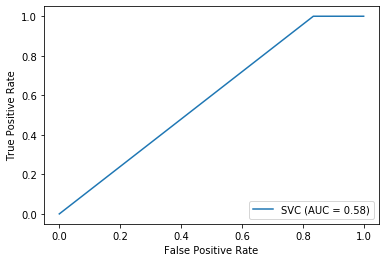

In [324]:
svc_disp = plot_roc_curve(svc, X_test, y_test)

#### SVC (AUC= 0.58) shows that the predictive model on COVID-19 deaths has no discriminatory ability.

In [328]:
print("https://www.sciencedirect.com/science/article/pii/S1556086415306043")

https://www.sciencedirect.com/science/article/pii/S1556086415306043


## Linear Regression: COVID-19 Global Data 

### The dependent variable that will be observed in the scenario of global data is the total deaths in comparison to the independent variables of the total recovered and confirmed COVID-19 patients. 

#### Import COVID-19 data that is compatible with a linear model: 

In [357]:
sample2 = pd.read_csv(r"covid_19_data.csv")

In [358]:
sample2 = pd.DataFrame(sample2)

#### Clean and organize the data: 

In [361]:
data2 = sample2.drop(columns = ['SNo', 'ObservationDate', 'Province/State', 'Country/Region', 'Last Update'])

In [362]:
data2

,Confirmed,Deaths,Recovered
0,1.0,0.0,0.0
1,14.0,0.0,0.0
2,6.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,0.0
...,...,...,...
20569,566.0,7.0,0.0
20570,76.0,3.0,73.0
20571,11.0,0.0,0.0
20572,185.0,2.0,181.0


#### Import the Linear Regression module and instantiate the X and y for the model: 

In [366]:
from sklearn.linear_model import LinearRegression

In [368]:
y = np.array(data2['Deaths'])

In [369]:
X = np.array(data2[['Confirmed', 'Recovered']])

In [380]:
np.shape(y)

(20574,)

In [381]:
np.shape(X)

(20574, 2)

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

#### Instantiate the linear regression function and train the data: 

In [372]:
linreg = LinearRegression()

In [373]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Test the data and observe the statistical information: 

In [374]:
y_pred = linreg.predict(X_test)

In [377]:
print('Accuracy of Linear classifier on test set: {:.2f}'.format(linreg.score(X_test, y_test)))

Accuracy of Linear classifier on test set: 0.80


In [390]:
print('Coefficient: \n', linreg.coef_)

Coefficient: 
 [ 0.08607357 -0.00707378]


In [387]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 536989.18


In [388]:
print('r_2 statistic: %.2f' % r2_score(y_test, y_pred))

r_2 statistic: 0.80


#### Visualize the data for the train and test sets: 

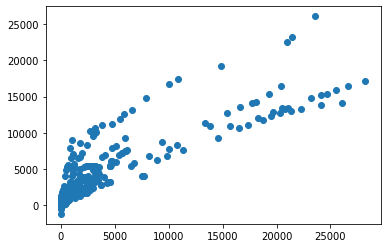

In [402]:
plt.plot(y_test, y_pred, 'o');

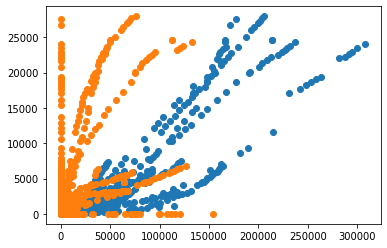

In [404]:
plt.plot(X_train, y_train, 'o')

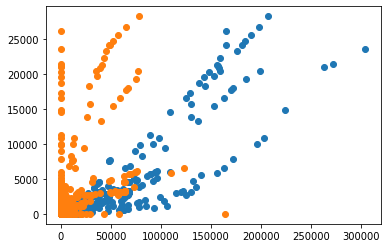

In [401]:
plt.plot(X_test, y_test, 'o');